<a href="https://colab.research.google.com/github/IsraelAlvarado/ciencias-de-datos-G6/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install bibtexparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bibtexparser: filename=bibtexparser-1.4.1-py3-none-any.whl size=43252 sha256=576744c01fe85c1b5dccafbdaf0ebd05b2ebcd916525e2167d15565230fe21f9
  Stored in directory: /root/.cache/pip/wheels/08/c6/c3/56e639fab68d1fdbf13ea147636d9795ccdbd3c1d3178d1332
Successfully built bibtexparser


In [112]:
!pip install gensim

#**Cargar los datos de ScienceDiret**

717 articulos usados para este analisis

In [127]:
import bibtexparser
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import seaborn as sns

Convertir los datos bip a csv

In [82]:
with open("/content/drive/MyDrive/Colab Notebooks/proyecto2/ScienceDirect_citations_1722806025414.bib") as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

df = pd.DataFrame(bib_database.entries)
selection = df[['doi', 'number','title','keywords','abstract','year']]
selection.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/ScienceDirect_citations_1722806025414.bib.csv', index=False)

In [83]:
df.columns = df.columns.str.lower()
df.head(5)

,abstract,keywords,author,url,doi,issn,year,pages,volume,journal,title,entrytype,id,number
0,"Mapping the distribution, pattern, and composi...","Urban land use type, Deep learning, Remote sen...",Ziming Li and Bin Chen and Shengbiao Wu and Mo...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.rse.2024.114290,0034-4257,2024,114290,311,Remote Sensing of Environment,Deep learning for urban land use category clas...,article,LI2024114290,NaN
1,Rapid urbanization and globalization have resu...,"Big data, Artificial intelligence, Machine lea...",S. Abirami and M. Pethuraj and M. Uthayakumar ...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.cstp.2024.101247,2213-624X,2024,101247,17,Case Studies on Transport Policy,A systematic survey on big data and artificial...,article,ABIRAMI2024101247,NaN
2,"In recent years, artificial intelligence (AI) ...","Artificial intelligence, Big data, Urban plann...",Tim Heinrich Son and Zack Weedon and Tan Yigit...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.scs.2023.104562,2210-6707,2023,104562,94,Sustainable Cities and Society,Algorithmic urban planning for smart and susta...,article,SON2023104562,NaN
3,The increasing urbanization in a poorly planne...,"Smart city, Internet of things, Technological ...",Elizeu Jacques and Alvaro {Neuenfeldt Júnior} ...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.heliyon.2024.e27850,2405-8440,2024,e27850,10,Heliyon,Smart cities and innovative urban management: ...,article,JACQUES2024e27850,6
4,This paper explores the linkages between urban...,"Urban form, Total factor productivity, China",Yuanyuan Gu and Xiaoxue Zhou and Qiao Wang and...,https://www.sciencedirect.com/science/article/...,https://doi.org/10.1016/j.asieco.2024.101785,1049-0078,2024,101785,94,Journal of Asian Economics,Urban form deterioration and productivity in C...,article,GU2024101785,NaN


#**Cargar los datos de Scopus**

313 documentos utilizados para este analisis

In [84]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/scopus.csv')
df2.columns = df2.columns.str.lower()

In [85]:
df2.head(5)

,authors,author full names,author(s) id,title,year,source title,volume,issue,art. no.,page start,...,isbn,coden,pubmed id,language of original document,abbreviated source title,document type,publication stage,open access,source,eid
0,Huang D.; Zhang Y.; Cheng H.; Andrea C.; Shi J...,"Huang, Di (57218225030); Zhang, Yan (591789093...",57218225030; 59178909300; 7404286048; 58788673...,Evaluating air pollution exposure among cyclis...,2024,Science of the Total Environment,945,NaN,173559,NaN,...,NaN,STEVA,38806121.0,English,Sci. Total Environ.,Article,Final,NaN,Scopus,2-s2.0-85196401948
1,Patil M.; Majumdar B.B.; Sahu P.K.,"Patil, Mallikarjun (57224749419); Majumdar, Ba...",57224749419; 56414310400; 56549579000,Travel Behavior-Based Investigation on the Pro...,2024,Journal of Urban Planning and Development,150,4,04024035,NaN,...,NaN,NaN,NaN,English,J. Urban Plann. Dev.,Article,Final,NaN,Scopus,2-s2.0-85199281719
2,Shan H.; Shao S.,"Shan, Haiyan (26650117700); Shao, Shangmiao (5...",26650117700; 59175409500,Impact of green innovation on carbon reduction...,2024,Scientific Reports,14,1,14032,NaN,...,NaN,NaN,38890482.0,English,Sci. Rep.,Article,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85196154061
3,Fayet Y.; Bonnin T.; Canali S.; Giroux E.,"Fayet, Yohan (55812504400); Bonnin, Thomas (57...",55812504400; 57208148207; 57205766489; 5556614...,Putting the exposome into practice: An analysi...,2024,Social Science and Medicine,354,NaN,117056,NaN,...,NaN,SSMDE,39029140.0,English,Soc. Sci. Med.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85198749374
4,Bittencourt J.C.N.; Costa D.G.; Portugal P.; V...,"Bittencourt, João Carlos N. (57117498600); Cos...",57117498600; 35519411300; 8528261900; 6603542902,A data-driven clustering approach for assessin...,2024,Sustainable Cities and Society,108,NaN,105477,NaN,...,NaN,NaN,NaN,English,Sustainable Cities Soc.,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85192450230


In [86]:
df.columns

Index(['abstract', 'keywords', 'author', 'url', 'doi', 'issn', 'year', 'pages',
       'volume', 'journal', 'title', 'entrytype', 'id', 'number'],
      dtype='object')

In [87]:
df2.columns

Index(['authors', 'author full names', 'author(s) id', 'title', 'year',
       'source title', 'volume', 'issue', 'art. no.', 'page start', 'page end',
       'page count', 'cited by', 'doi', 'link', 'affiliations',
       'authors with affiliations', 'abstract', 'author keywords',
       'index keywords', 'molecular sequence numbers', 'chemicals/cas',
       'tradenames', 'manufacturers', 'funding details', 'funding texts',
       'references', 'correspondence address', 'editors', 'publisher',
       'sponsors', 'conference name', 'conference date', 'conference location',
       'conference code', 'issn', 'isbn', 'coden', 'pubmed id',
       'language of original document', 'abbreviated source title',
       'document type', 'publication stage', 'open access', 'source', 'eid'],
      dtype='object')

In [88]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/ScienceDirect_citations_1722806025414.bib1.csv', index=False)
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/scopus1.csv', index=False)


# **unir csv y limpiar datos**

In [93]:
columns_df = set(df.columns)
columns_df2 = set(df2.columns)

unique_columns_df = columns_df - columns_df2
unique_columns_df2 = columns_df2 - columns_df
common_columns = columns_df & columns_df2


df_combinado = pd.concat([
    df[list(unique_columns_df) + list(common_columns)],
    df2[list(unique_columns_df2) + list(common_columns)]
], axis=0, ignore_index=True)

df_combinado = df_combinado.loc[:, ~df_combinado.columns.duplicated()]
df_combinado = df_combinado[sorted(df_combinado.columns)]


df_combinado.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/resulting_csv.csv', index=False)

In [94]:
df_combinado.columns

Index(['abbreviated source title', 'abstract', 'affiliations', 'art. no.',
       'author', 'author full names', 'author keywords', 'author(s) id',
       'authors', 'authors with affiliations', 'chemicals/cas', 'cited by',
       'coden', 'conference code', 'conference date', 'conference location',
       'conference name', 'correspondence address', 'document type', 'doi',
       'editors', 'eid', 'entrytype', 'funding details', 'funding texts', 'id',
       'index keywords', 'isbn', 'issn', 'issue', 'journal', 'keywords',
       'language of original document', 'link', 'manufacturers',
       'molecular sequence numbers', 'number', 'open access', 'page count',
       'page end', 'page start', 'pages', 'publication stage', 'publisher',
       'pubmed id', 'references', 'source', 'source title', 'sponsors',
       'title', 'tradenames', 'url', 'volume', 'year'],
      dtype='object')

In [95]:
df_combinado.head(5)

,abbreviated source title,abstract,affiliations,art. no.,author,author full names,author keywords,author(s) id,authors,authors with affiliations,...,pubmed id,references,source,source title,sponsors,title,tradenames,url,volume,year
0,NaN,"Mapping the distribution, pattern, and composi...",NaN,NaN,Ziming Li and Bin Chen and Shengbiao Wu and Mo...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Deep learning for urban land use category clas...,NaN,https://www.sciencedirect.com/science/article/...,311,2024
1,NaN,Rapid urbanization and globalization have resu...,NaN,NaN,S. Abirami and M. Pethuraj and M. Uthayakumar ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,A systematic survey on big data and artificial...,NaN,https://www.sciencedirect.com/science/article/...,17,2024
2,NaN,"In recent years, artificial intelligence (AI) ...",NaN,NaN,Tim Heinrich Son and Zack Weedon and Tan Yigit...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Algorithmic urban planning for smart and susta...,NaN,https://www.sciencedirect.com/science/article/...,94,2023
3,NaN,The increasing urbanization in a poorly planne...,NaN,NaN,Elizeu Jacques and Alvaro {Neuenfeldt Júnior} ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Smart cities and innovative urban management: ...,NaN,https://www.sciencedirect.com/science/article/...,10,2024
4,NaN,This paper explores the linkages between urban...,NaN,NaN,Yuanyuan Gu and Xiaoxue Zhou and Qiao Wang and...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Urban form deterioration and productivity in C...,NaN,https://www.sciencedirect.com/science/article/...,94,2024


In [97]:
df_combinado.dtypes

,0
abbreviated source title,object
abstract,object
affiliations,object
art. no.,object
author,object
author full names,object
author keywords,object
author(s) id,object
authors,object
authors with affiliations,object


In [106]:
# 1. Eliminación de duplicados
df_combinado = df_combinado.drop_duplicates()

# 2. Manejo de valores faltantes
# Opcional: Rellenar valores faltantes con un valor específico o con la media/moda
df_combinado = df_combinado.fillna('')

# Alternativamente, eliminar filas con valores faltantes
df_combinado = df_combinado.dropna()

# 3. Corrección de tipos de datos
# Replace 'some_column' with the actual column you want to convert
# For example, to convert column 'Age' to integer:
if 'Age' in df_combinado.columns:
    df_combinado['Age'] = df_combinado['Age'].astype(int)

# 4. Normalización de datos
# Por ejemplo, convertir texto a minúsculas para consistencia
df_combinado = df_combinado.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# 5. Eliminación de espacios y caracteres especiales en textos
df_combinado = df_combinado.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_combinado.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/resulting_csv.csv', index=False)

<ipython-input-106-147603036715>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combinado = df_combinado.applymap(lambda x: x.lower() if isinstance(x, str) else x)
<ipython-input-106-147603036715>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combinado = df_combinado.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [107]:
df_combinado.head(5)

,abbreviated source title,abstract,affiliations,art. no.,author,author full names,author keywords,author(s) id,authors,authors with affiliations,...,pubmed id,references,source,source title,sponsors,title,tradenames,url,volume,year
0,,"mapping the distribution, pattern, and composi...",,,ziming li and bin chen and shengbiao wu and mo...,,,,,,...,,,,,,deep learning for urban land use category clas...,,https://www.sciencedirect.com/science/article/...,311,2024
1,,rapid urbanization and globalization have resu...,,,s. abirami and m. pethuraj and m. uthayakumar ...,,,,,,...,,,,,,a systematic survey on big data and artificial...,,https://www.sciencedirect.com/science/article/...,17,2024
2,,"in recent years, artificial intelligence (ai) ...",,,tim heinrich son and zack weedon and tan yigit...,,,,,,...,,,,,,algorithmic urban planning for smart and susta...,,https://www.sciencedirect.com/science/article/...,94,2023
3,,the increasing urbanization in a poorly planne...,,,elizeu jacques and alvaro {neuenfeldt júnior} ...,,,,,,...,,,,,,smart cities and innovative urban management: ...,,https://www.sciencedirect.com/science/article/...,10,2024
4,,this paper explores the linkages between urban...,,,yuanyuan gu and xiaoxue zhou and qiao wang and...,,,,,,...,,,,,,urban form deterioration and productivity in c...,,https://www.sciencedirect.com/science/article/...,94,2024


In [108]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4647 entries, 0 to 4646
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   abbreviated source title       4647 non-null   object
 1   abstract                       4647 non-null   object
 2   affiliations                   4647 non-null   object
 3   art. no.                       4647 non-null   object
 4   author                         4647 non-null   object
 5   author full names              4647 non-null   object
 6   author keywords                4647 non-null   object
 7   author(s) id                   4647 non-null   object
 8   authors                        4647 non-null   object
 9   authors with affiliations      4647 non-null   object
 10  chemicals/cas                  4647 non-null   object
 11  cited by                       4647 non-null   object
 12  coden                          4647 non-null   object
 13  con

In [110]:
df_combinado.describe()

,abbreviated source title,abstract,affiliations,art. no.,author,author full names,author keywords,author(s) id,authors,authors with affiliations,...,pubmed id,references,source,source title,sponsors,title,tradenames,url,volume,year
count,4647,4647,4647,4647,4647,4647,4647,4647,4647,4647,...,4647,4647,4647,4647,4647,4647,4647,4647,4647,4647
unique,1544,4645,4528,2237,26,4571,4097,4563,4520,4596,...,427,4592,2,1587,213,4642,7,26,755,10
top,sustainability,"in the dynamic urban landscape, where interpla...",,,,,,,,,...,,,scopus,sustainability (switzerland),,logistics network deployment planning under th...,,,,2021
freq,157,2,40,2269,4622,25,546,25,25,40,...,4221,56,4622,157,4260,2,4641,4622,784,1038


# **analisis no supervisado y topicos**

In [118]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_combinado['abstract'])

# Aplicar LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Obtener los temas
topic_words = {}
for topic_idx, topic in enumerate(lda.components_):
    topic_words[f"Topic {topic_idx}"] = [vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]

print(topic_words)

{'Topic 0': ['patients', 'ci', '95', 'children', 'women', 'pm2', 'vibrancy', 'lst', 'health', 'temperature'], 'Topic 1': ['ca', 'cervical', 'pss', 'entrepreneurial', 'tweet', 'tabriz', 'disabled', 'bda', 'wolbachia', 'shenyang'], 'Topic 2': ['dengue', 'cuisine', 'rentals', 'brazil', 'bond', 'es', 'immunization', 'crash', 'microwave', 'uam'], 'Topic 3': ['uhi', 'shrinkage', 'crashes', 'crash', 'cognitive', 'emotions', 'ethical', 'metaverse', 'hoc', 'groundwater'], 'Topic 4': ['pollen', 'interchange', 'roundabouts', 'gaseous', 'igg', 'urbanity', 'nfp', 'uer', 'seafood', 'sgbv'], 'Topic 5': ['ridesourcing', 'machinery', 'cbtc', 'braking', 'tea', 'digitalisation', 'bsd', 'ugbs', 'bsss', 'ahe'], 'Topic 6': ['ev', 'jogging', 'upgs', 'crimes', 'mus', 'furniture', 'nhi', 'garden', 'lanes', 'fertility'], 'Topic 7': ['data', 'urban', 'traffic', 'smart', 'city', 'cities', 'big', 'development', 'spatial', 'based'], 'Topic 8': ['charging', 'tb', 'personality', 'hsr', 'streetscape', 'haze', 'evs', '

In [119]:
# Aplicar K-Means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Asignar clusters
df_combinado['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [120]:
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df_combinado['abstract'])

# Obtener palabras clave
sum_words = X_count.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Mostrar palabras clave
print(words_freq[:10])

[('data', 12898), ('urban', 11460), ('big', 4743), ('study', 3971), ('city', 3869), ('cities', 3812), ('based', 3792), ('big data', 3737), ('development', 3237), ('spatial', 3006)]


In [126]:


# Supongamos que tienes una función para calcular la coherencia
def calculate_coherence_score(lda_model, corpus):
    # Create a dictionary from the corpus
    dictionary = Dictionary(corpus.str.split())  # Assuming corpus is a Series of strings

    # Get topics from the LDA model (workaround for sklearn LDA)
    topics = [[dictionary[word_id] for word_id, _ in enumerate(topic)]
              for topic in lda_model.components_]

    coherence_model_lda = CoherenceModel(topics=topics, texts=corpus.str.split(), dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

# Evaluar la coherencia del modelo LDA
coherence_score = calculate_coherence_score(lda, df_combinado['abstract'])
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4052348849129017


# **Graficas**

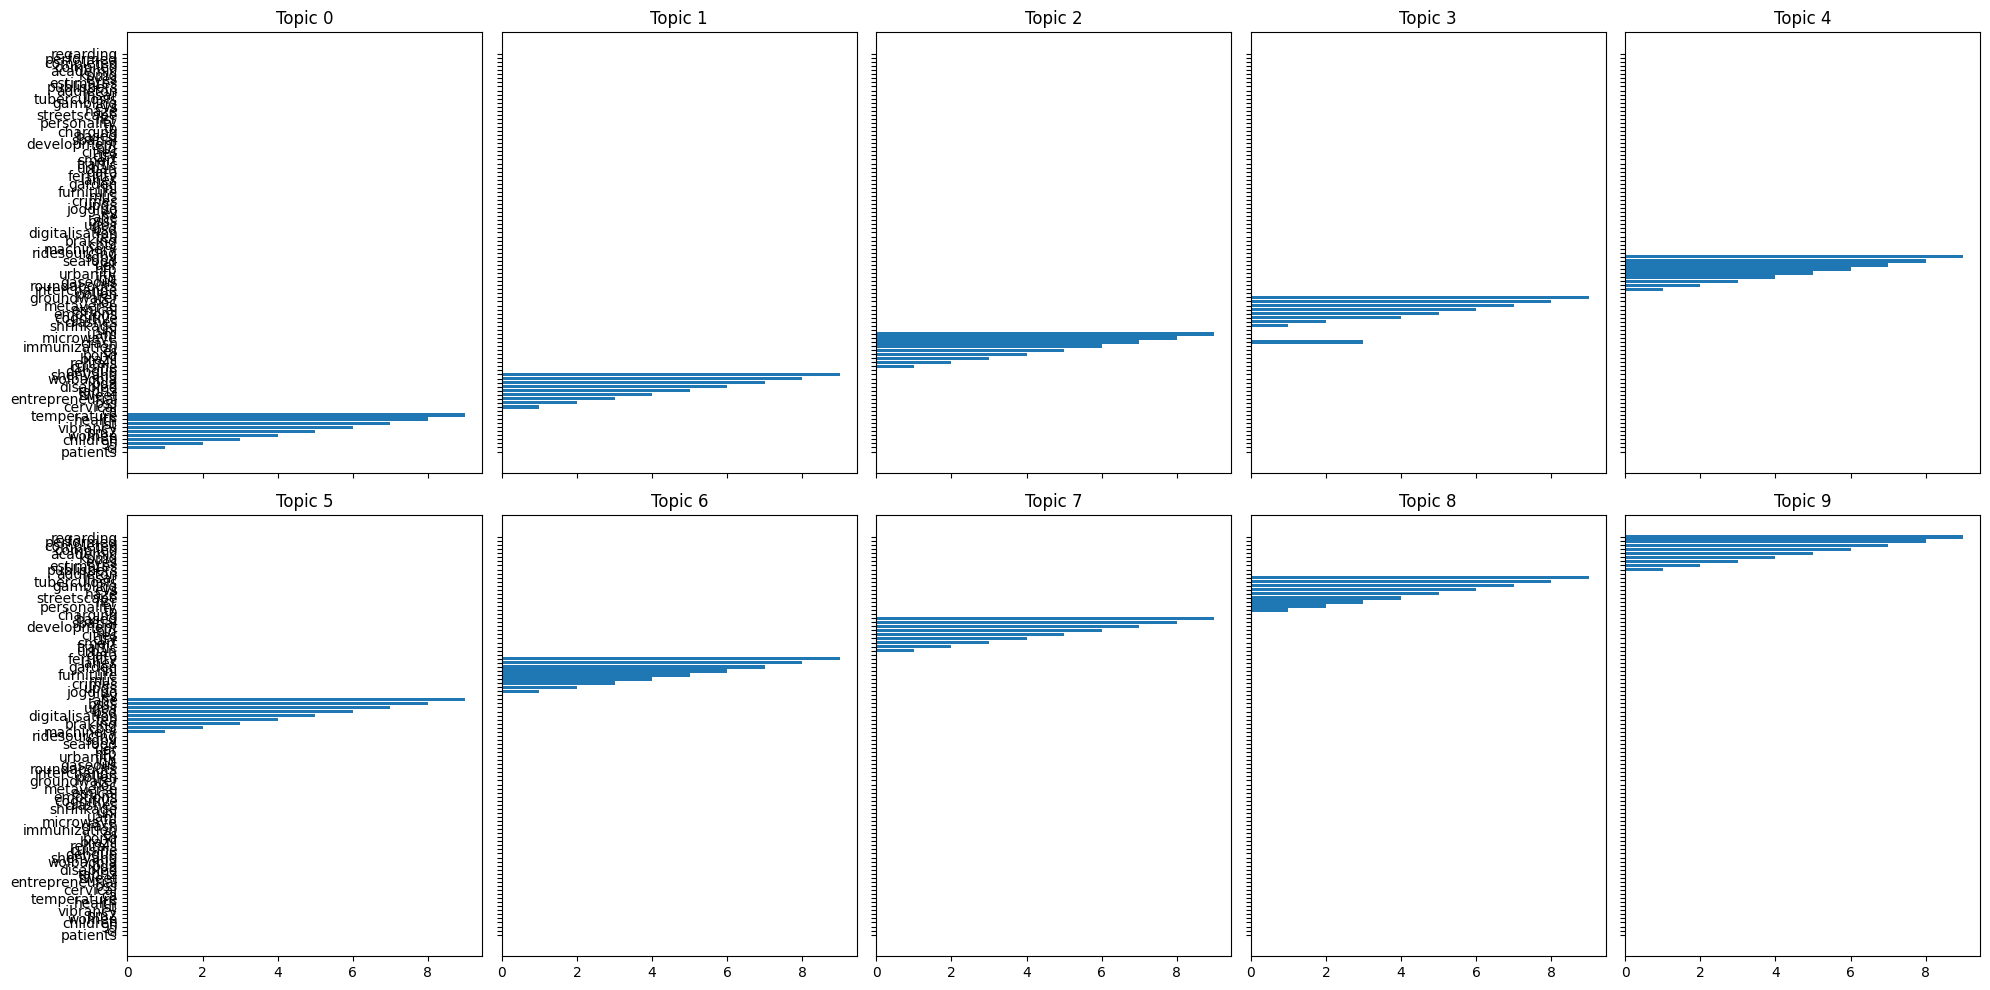

In [128]:
def plot_lda_topics(topic_words):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10), sharex=True, sharey=True)
    axes = axes.flatten()
    for topic_num, (topic, words) in enumerate(topic_words.items()):
        axes[topic_num].barh(words, range(len(words)))
        axes[topic_num].set_title(f"Topic {topic_num}")
        axes[topic_num].invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_lda_topics(topic_words)

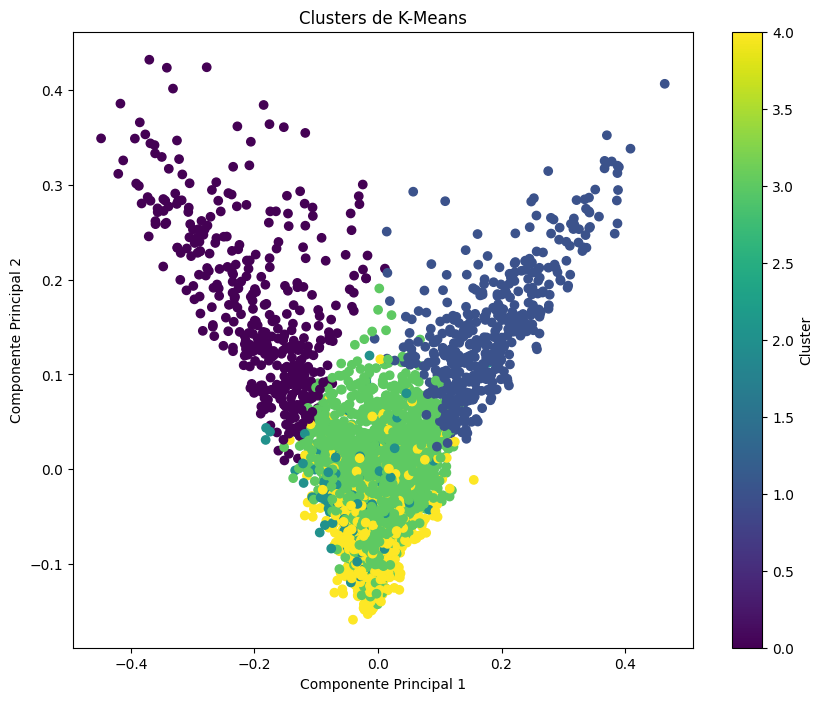

In [133]:
# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Crear un DataFrame para facilitar la visualización
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Assuming 'kmeans' is the fitted KMeans model
df_combinado['Cluster'] = kmeans.labels_  # Assign cluster labels to the DataFrame

df_pca['Cluster'] = df_combinado['Cluster']  # Now you can access the 'Cluster' column

# Graficar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis', marker='o')
plt.colorbar(label='Cluster')
plt.title('Clusters de K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

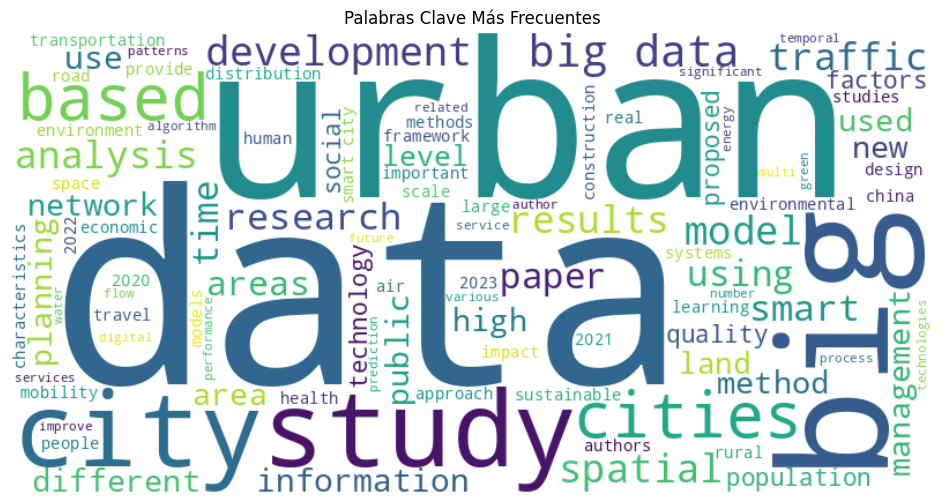

In [130]:
# Crear una cadena de texto con las palabras clave
word_freq_dict = dict(words_freq[:100])  # Ajusta el número de palabras según sea necesario
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras Clave Más Frecuentes')
plt.show()

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


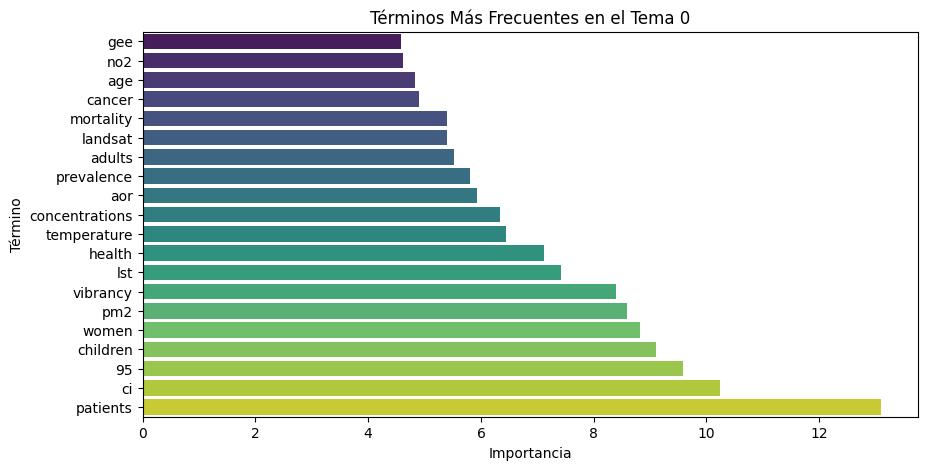

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


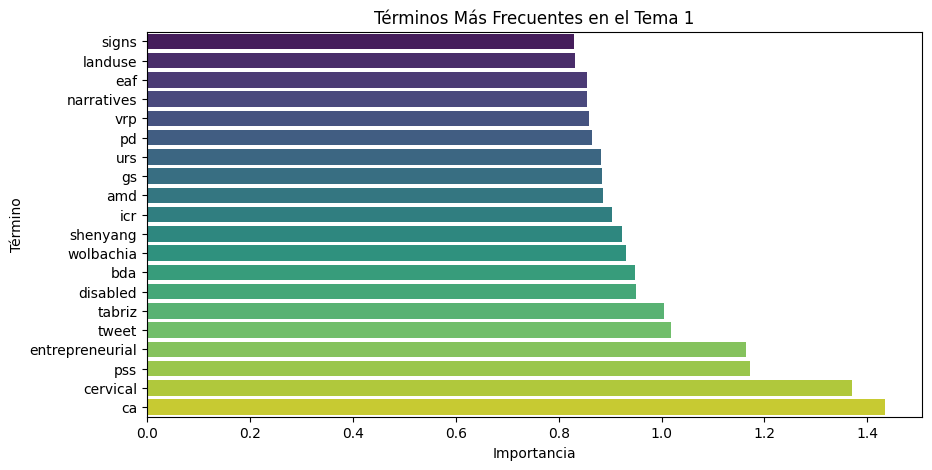

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


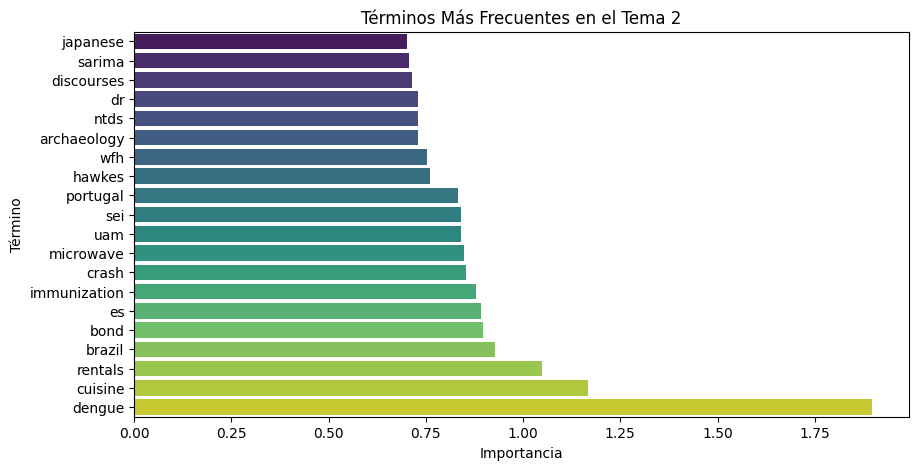

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


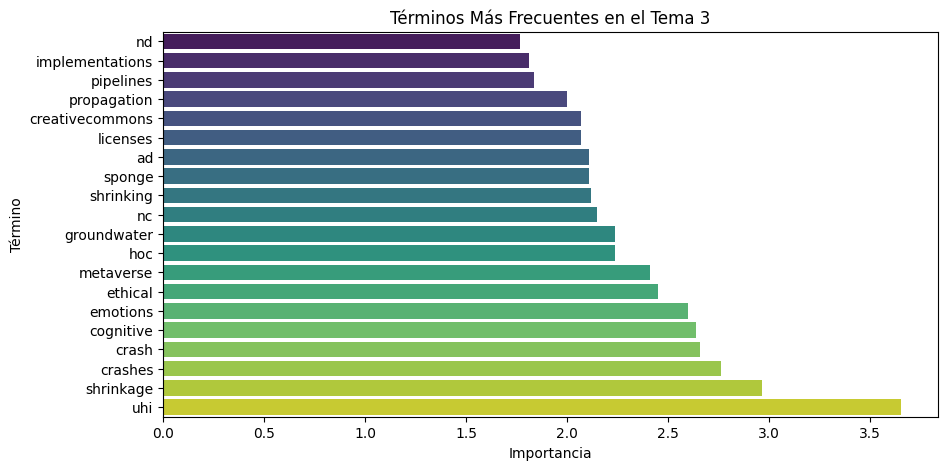

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


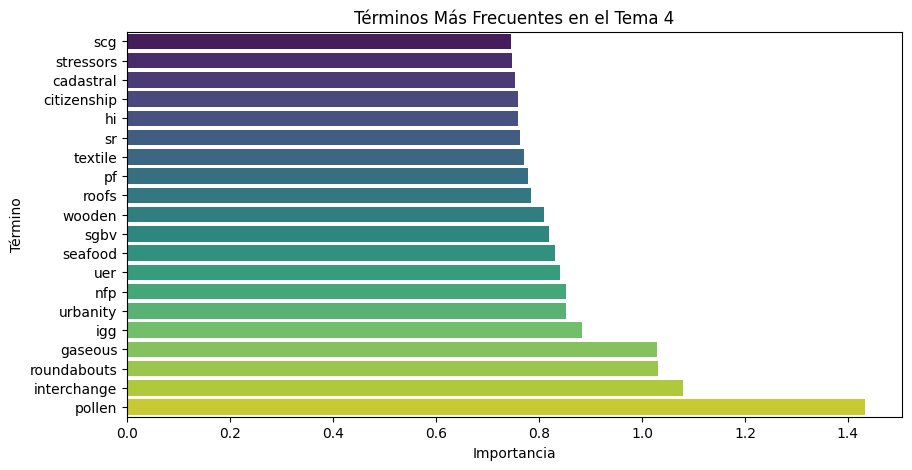

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


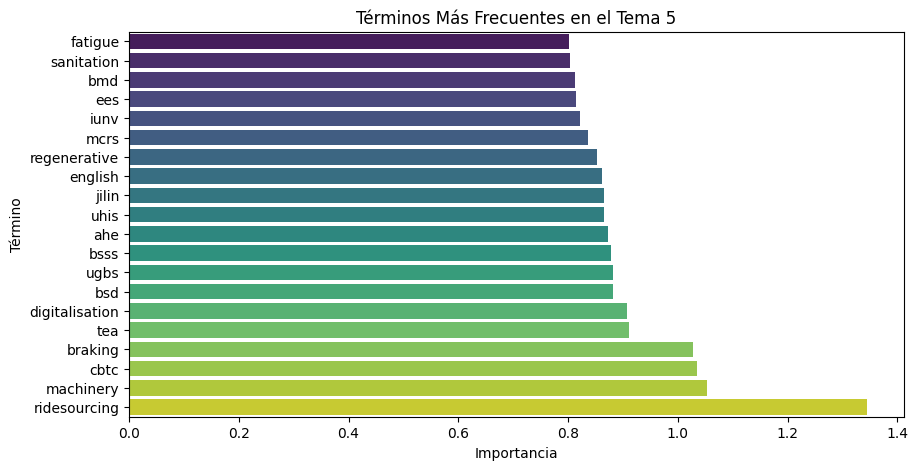

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


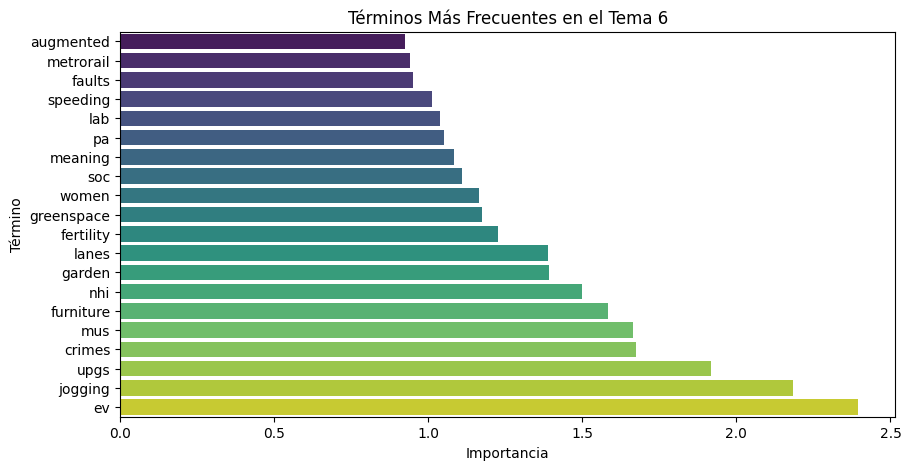

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


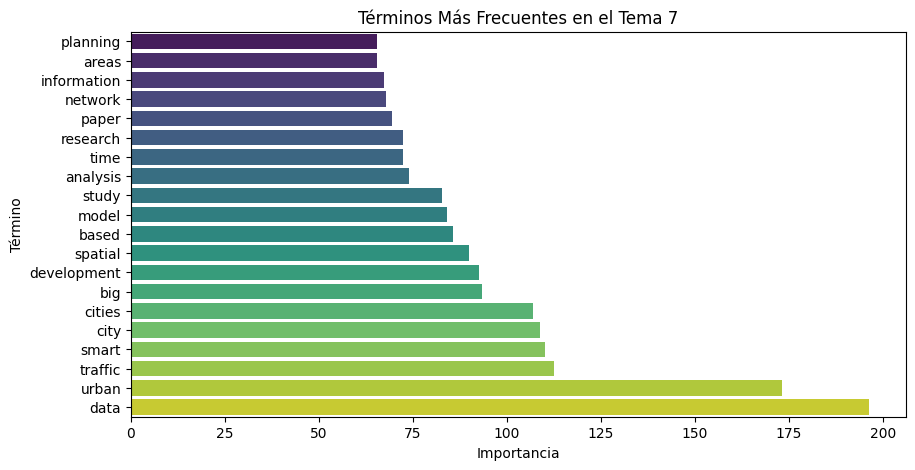

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


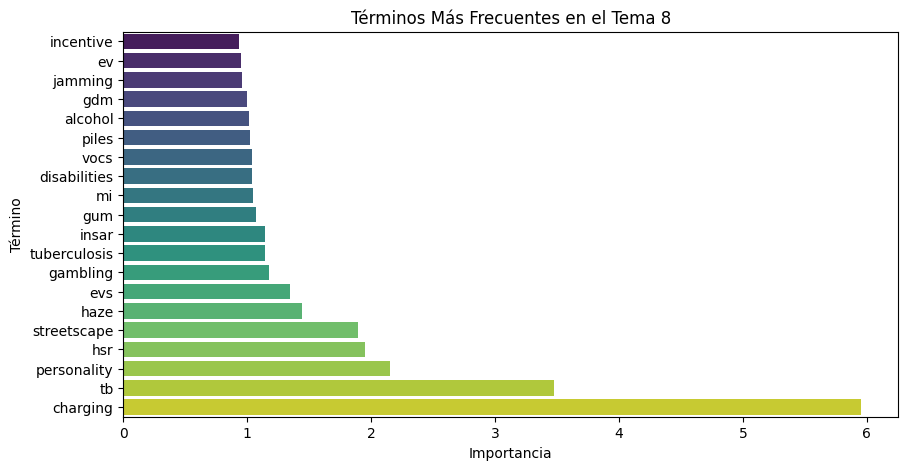

<ipython-input-131-d04c01693bcb>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette='viridis')


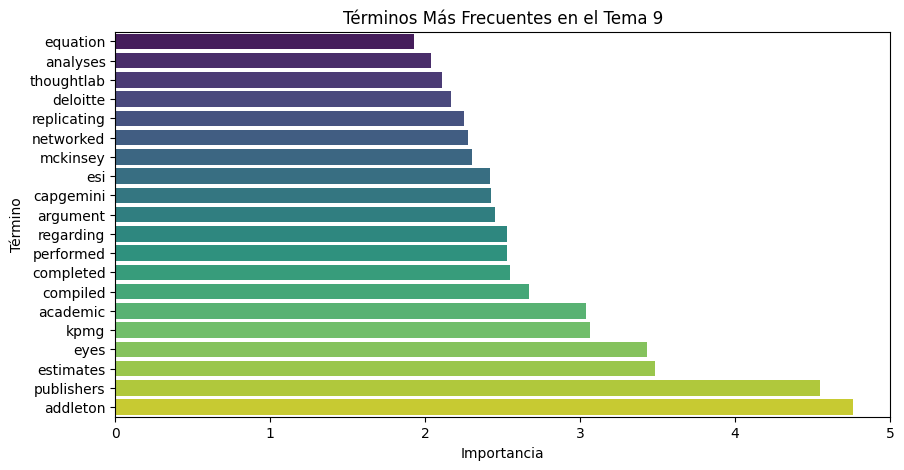

In [131]:
# Obtener los términos más frecuentes en cada tema
def plot_topic_terms(lda_model, vectorizer, n_words=20):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_features_idx = topic.argsort()[-n_words:]
        top_features = [feature_names[i] for i in top_features_idx]
        top_scores = [topic[i] for i in top_features_idx]

        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_scores, y=top_features, palette='viridis')
        plt.title(f'Términos Más Frecuentes en el Tema {topic_idx}')
        plt.xlabel('Importancia')
        plt.ylabel('Término')
        plt.show()

plot_topic_terms(lda, vectorizer)

In [139]:
# Vectorización usando CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df_combinado['abstract'])

# Obtener el vocabulario y la frecuencia de palabras
feature_names = count_vectorizer.get_feature_names_out()
word_freq = X_count.toarray()
# Extraer las palabras clave más frecuentes para cada documento
def extract_keywords(doc_word_freq, feature_names, top_n=10):
    word_indices = doc_word_freq.argsort()[-top_n:][::-1]
    keywords = [feature_names[i] for i in word_indices]
    return ' '.join(keywords)

# Aplicar la extracción de palabras clave a cada documento
df_combinado['Keywords'] = [extract_keywords(doc_freq, feature_names) for doc_freq in word_freq]

# Guardar el DataFrame con las nuevas columnas
df_combinado.to_csv('/content/drive/MyDrive/Colab Notebooks/proyecto2/analysis.csv', index=False)

In [140]:
df_combinado.head(5)

,abbreviated source title,abstract,affiliations,art. no.,author,author full names,author keywords,author(s) id,authors,authors with affiliations,...,source,source title,sponsors,title,tradenames,url,volume,year,Cluster,Keywords
0,,"mapping the distribution, pattern, and composi...",,,ziming li and bin chen and shengbiao wu and mo...,,,,,,...,,,,deep learning for urban land use category clas...,,https://www.sciencedirect.com/science/article/...,311,2024,4,mapping land use land use learning urban deep ...
1,,rapid urbanization and globalization have resu...,,,s. abirami and m. pethuraj and m. uthayakumar ...,,,,,,...,,,,a systematic survey on big data and artificial...,,https://www.sciencedirect.com/science/article/...,17,2024,0,transportation data ai big data big traffic in...
2,,"in recent years, artificial intelligence (ai) ...",,,tim heinrich son and zack weedon and tan yigit...,,,,,,...,,,,algorithmic urban planning for smart and susta...,,https://www.sciencedirect.com/science/article/...,94,2023,1,ai planning urban planning urban smart sustain...
3,,the increasing urbanization in a poorly planne...,,,elizeu jacques and alvaro {neuenfeldt júnior} ...,,,,,,...,,,,smart cities and innovative urban management: ...,,https://www.sciencedirect.com/science/article/...,10,2024,1,urban innovation urban spaces scope spaces act...
4,,this paper explores the linkages between urban...,,,yuanyuan gu and xiaoxue zhou and qiao wang and...,,,,,,...,,,,urban form deterioration and productivity in c...,,https://www.sciencedirect.com/science/article/...,94,2024,4,urban form urban form city form deterioration ...
